<a href="https://colab.research.google.com/github/Amy-0502/MyPython/blob/main/Homework3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#安裝套件用於抓取google drive圖片
!mkdir -p cat_dog_train
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
url='https://drive.google.com/uc?id=1NYAsskGbvXpuoj5i-pHlGXhoVyXgQV0J'
output='cat_dog_train/PetImages.zip'

import gdown
gdown.download(url=url,output=output,quiet=False,fuzzy=True)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1NYAsskGbvXpuoj5i-pHlGXhoVyXgQV0J
From (redirected): https://drive.google.com/uc?id=1NYAsskGbvXpuoj5i-pHlGXhoVyXgQV0J&confirm=t&uuid=d199689c-b68e-4b79-b63d-c6e9b6308aed
To: /content/cat_dog_train/PetImages.zip
100%|██████████| 723M/723M [00:04<00:00, 158MB/s]


'cat_dog_train/PetImages.zip'

In [ ]:
!unzip cat_dog_train/PetImages.zip -d cat_dog_train

串流輸出內容已截斷至最後 5000 行。
  inflating: cat_dog_train/PetImages/Dog/5164.jpg  
  inflating: cat_dog_train/PetImages/Dog/5165.jpg  
  inflating: cat_dog_train/PetImages/Dog/5166.jpg  
  inflating: cat_dog_train/PetImages/Dog/5167.jpg  
  inflating: cat_dog_train/PetImages/Dog/5168.jpg  
  inflating: cat_dog_train/PetImages/Dog/5169.jpg  
  inflating: cat_dog_train/PetImages/Dog/517.jpg  
  inflating: cat_dog_train/PetImages/Dog/5170.jpg  
  inflating: cat_dog_train/PetImages/Dog/5171.jpg  
  inflating: cat_dog_train/PetImages/Dog/5172.jpg  
  inflating: cat_dog_train/PetImages/Dog/5173.jpg  
  inflating: cat_dog_train/PetImages/Dog/5174.jpg  
  inflating: cat_dog_train/PetImages/Dog/5177.jpg  
  inflating: cat_dog_train/PetImages/Dog/5178.jpg  
  inflating: cat_dog_train/PetImages/Dog/5179.jpg  
  inflating: cat_dog_train/PetImages/Dog/518.jpg  
  inflating: cat_dog_train/PetImages/Dog/5180.jpg  
  inflating: cat_dog_train/PetImages/Dog/5181.jpg  
  inflating: cat_dog_train/PetImages/Dog/5182

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#處理圖片資料集

image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cat_dog_train/PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    labels='inferred', 
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cat_dog_train/PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    labels='inferred', 
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size,
)


Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


In [ ]:
#get the class name 
print("class name:",train_ds.class_names)

class name: ['Cat', 'Dog']


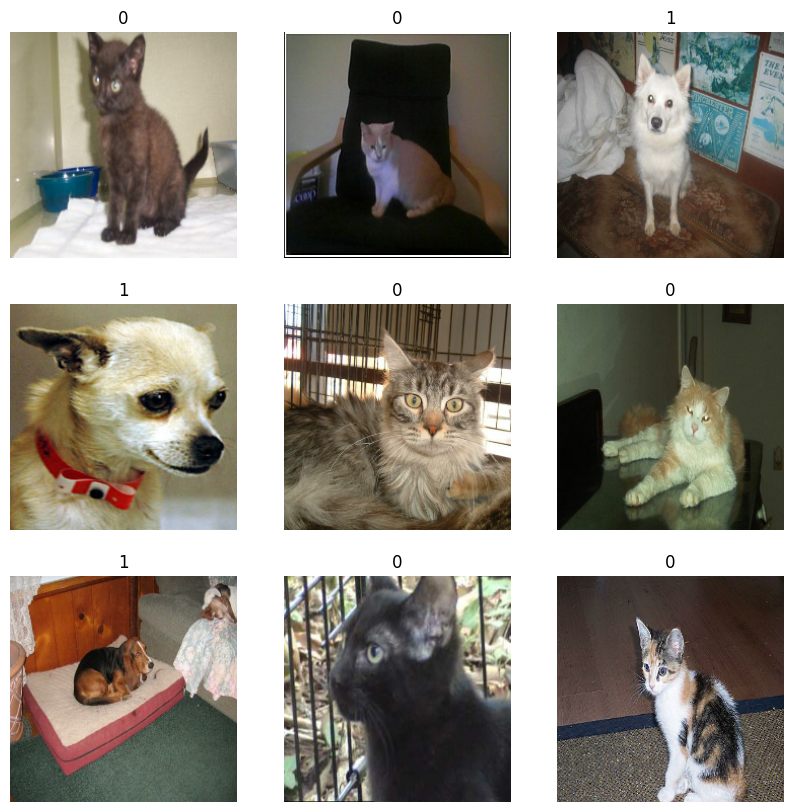

In [ ]:
#print cat and dog image

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
#a batch_size of images (batch_size=32)
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
#data_augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
    ]
)

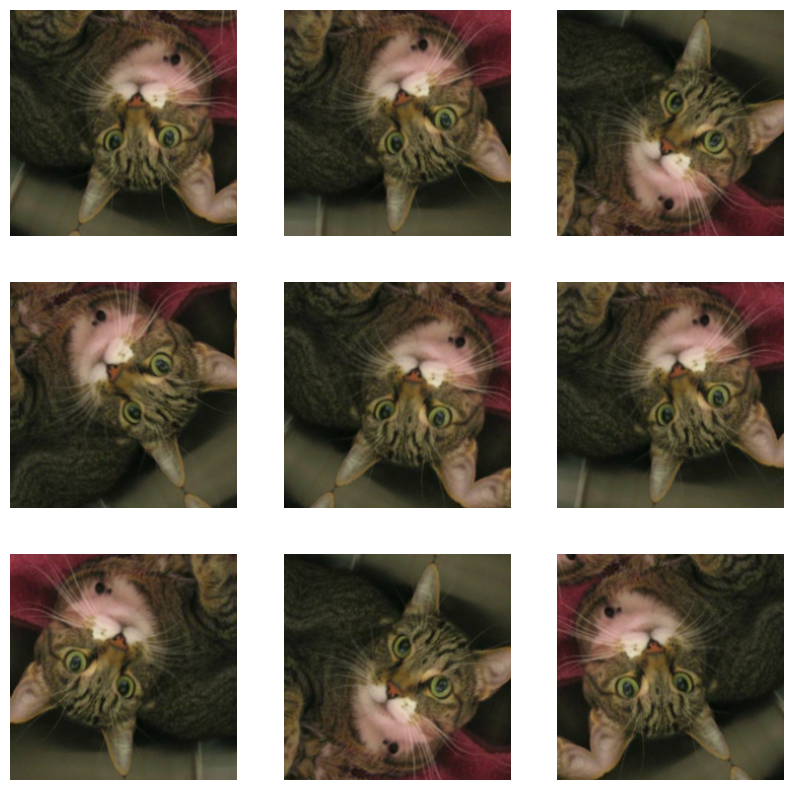

In [ ]:
#data_augmentation

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
#取得MobileNetV2網路架構
#include_top為False，表示只取得卷積層部分，不取得classifier部分，也就是FC層

IMG_SHAPE = image_size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

print("我們採用MobileNetV2網路架構，參數為imagenet，改造前的網路層數為: ", len(base_model.layers))

9406464/9406464 [==============================] - 0s 0us/step
我們採用MobileNetV2網路架構，參數為imagenet，改造前的網路層數為:  154


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
#找出倒數第6層的資訊
base_model.layers[-6].output

<KerasTensor: shape=(None, 7, 7, 960) dtype=float32 (created by layer 'block_16_depthwise_relu')>

In [ ]:
#layer名稱為: block_16_depthwise_relu之後的layer都將被刪除
#進行更換步驟，取出此層block_16_depthwise_relu的輸出
x=base_model.layers[-6].output

#將該層的輸出為一維陣列
i=layers.Flatten()(x)

#增加一層Dense，並把一維陣列作為輸入
#for 0/1 binary, set units=1 and use sigmoid 
output=layers.Dense(units=1,activation='sigmoid')(i)


In [ ]:
#建立一個Model，將原本的MobileNetV2與剛剛做的輸出層一起放進來
model=keras.Model(inputs=base_model.input,outputs=output)

In [ ]:
#先將此模型都不鎖定模型訓練，等等再調整
model.trainable = True

#total layers from MobileNetV2
print("我們採用MobileNetV2網路架構，參數為imagenet，經過改造後的網路層數為: ", len(model.layers))

#開始fine tune的layer層，可以自行設定
fine_tune_at = 100

#在fine_tune_at之前的layer層，都鎖定，不進行模型訓練
for layer in model.layers[:fine_tune_at]:
    layer.trainable = False

print("我們由第",fine_tune_at,"之後開始進行模型訓練，訓練的變數總共有",len(model.trainable_variables))

我們採用MobileNetV2網路架構，參數為imagenet，經過改造後的網路層數為:  151
我們由第 100 之後開始進行模型訓練，訓練的變數總共有 50


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
#學習率
rate = 0.0001

#編譯模型
#因為我們的圖片資料集為貓與狗，屬於二元推論，採用BinaryCrossentropy

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#擬合

model.fit(x=train_ds,validation_data=val_ds, epochs=10, verbose=2)                      

Epoch 1/10
586/586 - 70s - loss: 0.4110 - accuracy: 0.8060 - val_loss: 0.3948 - val_accuracy: 0.8192 - 70s/epoch - 119ms/step
Epoch 2/10
586/586 - 43s - loss: 0.1954 - accuracy: 0.9186 - val_loss: 0.3977 - val_accuracy: 0.8369 - 43s/epoch - 74ms/step
Epoch 3/10
586/586 - 46s - loss: 0.0885 - accuracy: 0.9680 - val_loss: 0.3586 - val_accuracy: 0.8730 - 46s/epoch - 78ms/step
Epoch 4/10
586/586 - 43s - loss: 0.0443 - accuracy: 0.9848 - val_loss: 0.4181 - val_accuracy: 0.8807 - 43s/epoch - 73ms/step
Epoch 5/10
586/586 - 43s - loss: 0.0278 - accuracy: 0.9907 - val_loss: 0.4709 - val_accuracy: 0.8789 - 43s/epoch - 73ms/step
Epoch 6/10
586/586 - 43s - loss: 0.0303 - accuracy: 0.9895 - val_loss: 0.4135 - val_accuracy: 0.8777 - 43s/epoch - 73ms/step
Epoch 7/10
586/586 - 46s - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.6668 - val_accuracy: 0.8591 - 46s/epoch - 78ms/step
Epoch 8/10
586/586 - 43s - loss: 0.0308 - accuracy: 0.9892 - val_loss: 0.8313 - val_accuracy: 0.8634 - 43s/epoch - 73ms/step

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


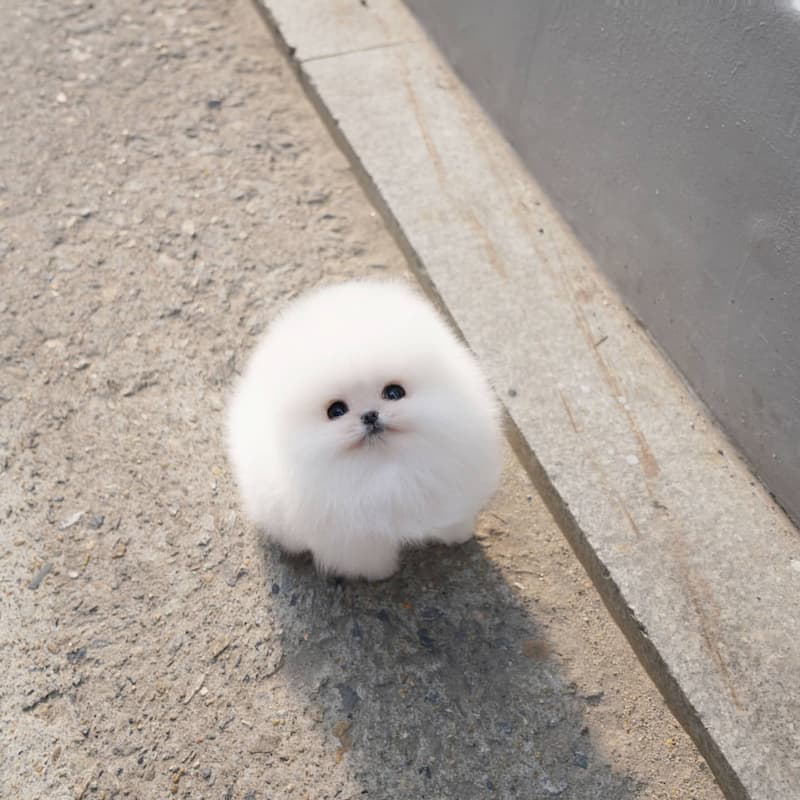

1/1 [==============================] - 0s 33ms/step
This image is 1.64 percent cat and 98.36 percent dog.


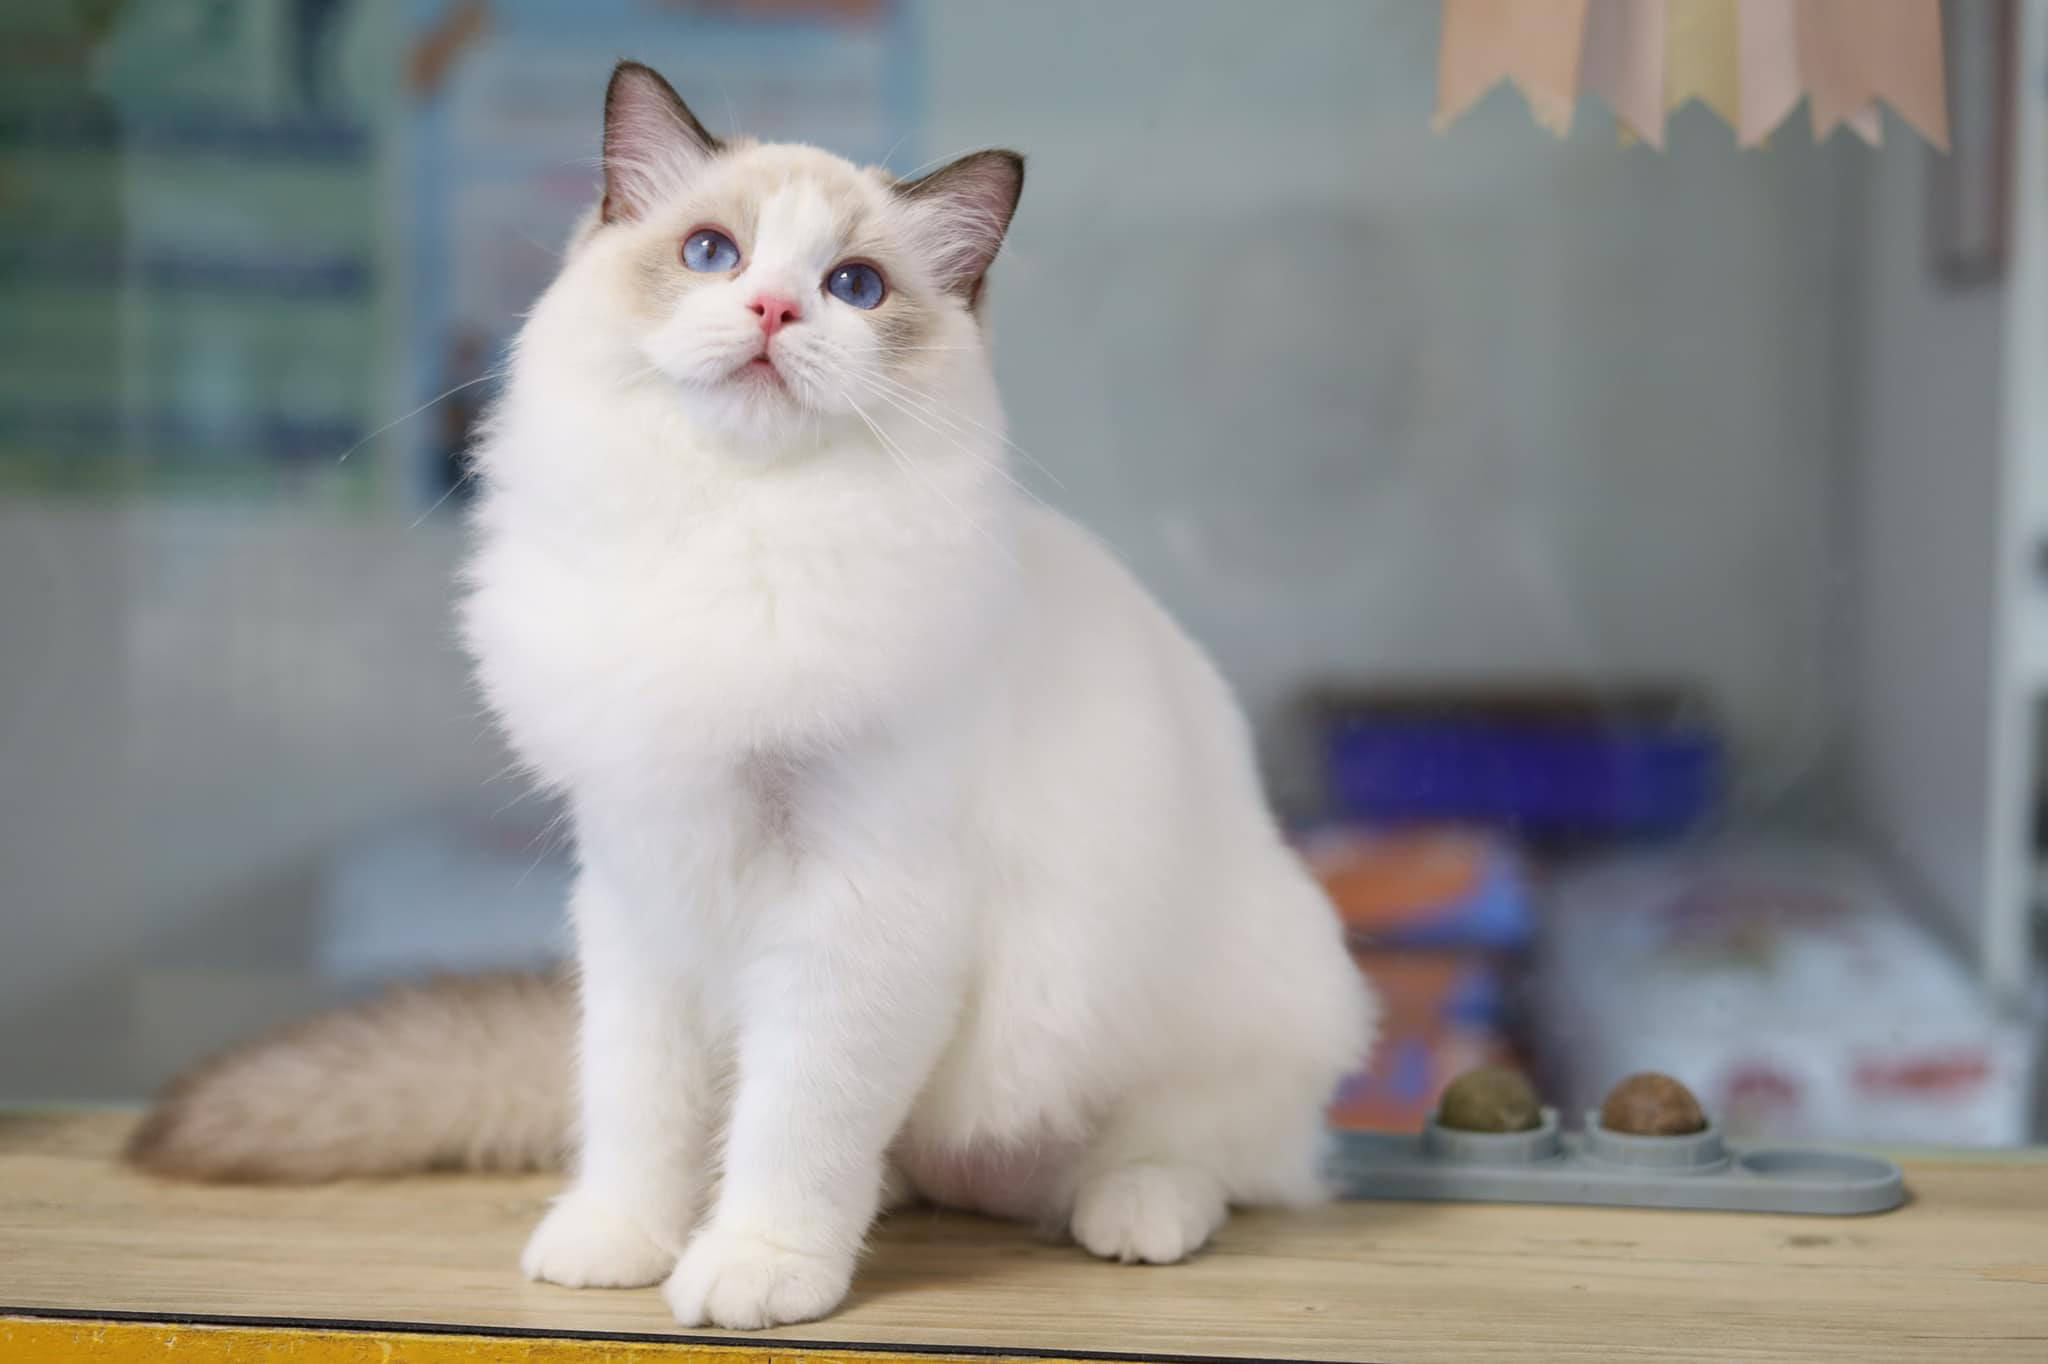

1/1 [==============================] - 0s 67ms/step
This image is 100.00 percent cat and 0.00 percent dog.


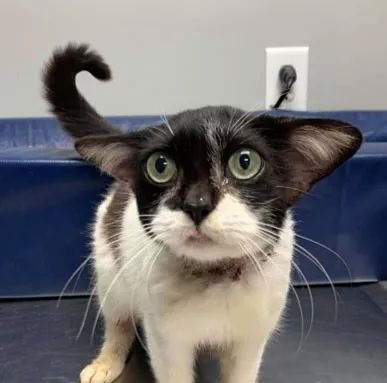

1/1 [==============================] - 0s 86ms/step
This image is 0.99 percent cat and 99.01 percent dog.


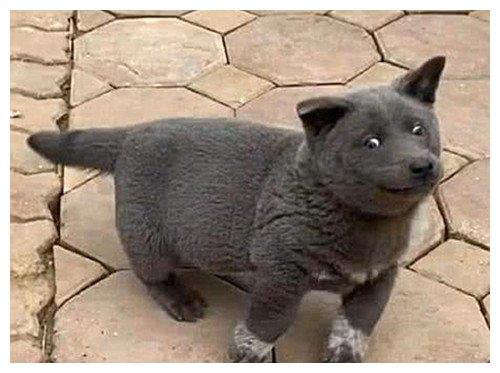

1/1 [==============================] - 0s 67ms/step
This image is 0.56 percent cat and 99.44 percent dog.


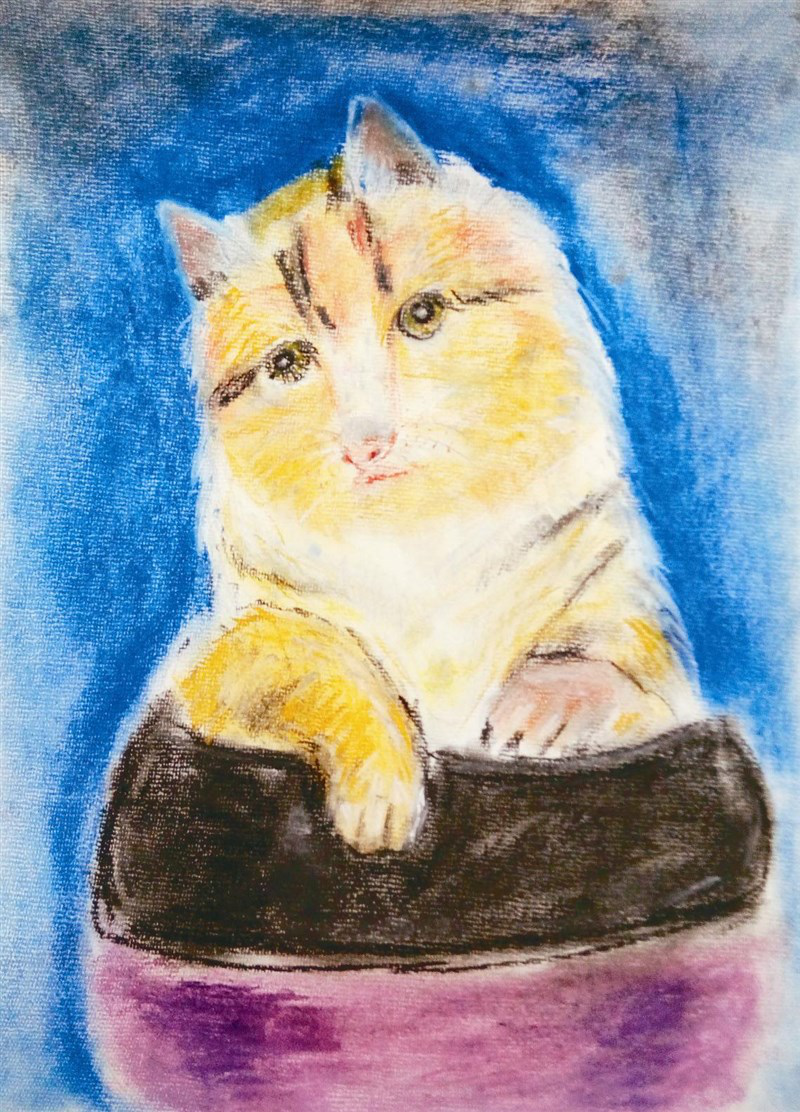

1/1 [==============================] - 0s 69ms/step
This image is 75.97 percent cat and 24.03 percent dog.


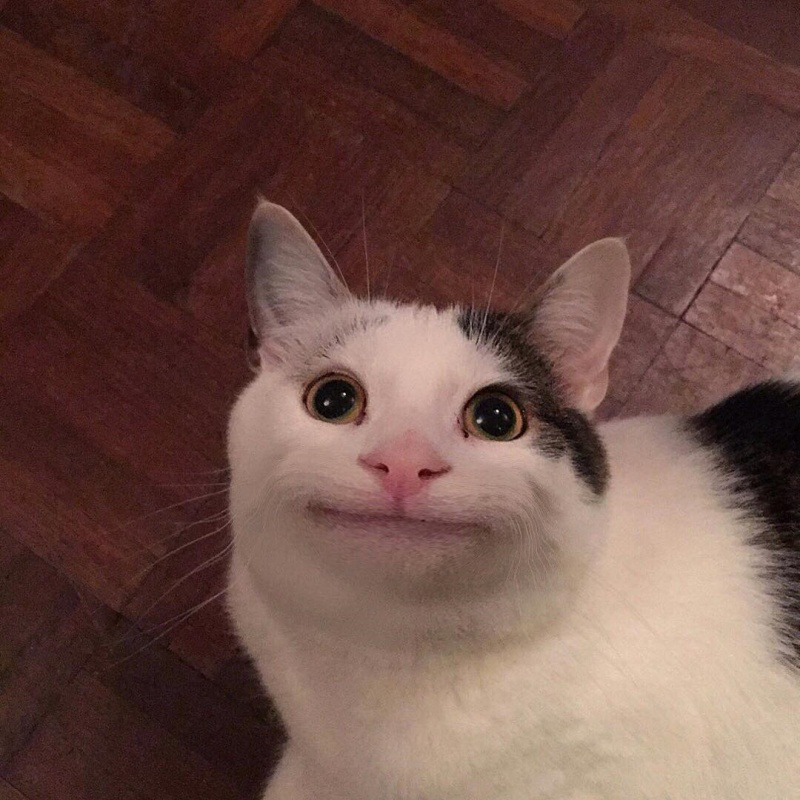

1/1 [==============================] - 0s 45ms/step
This image is 100.00 percent cat and 0.00 percent dog.


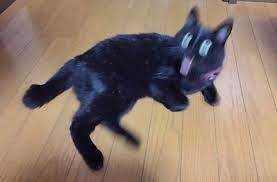

1/1 [==============================] - 0s 56ms/step
This image is 92.82 percent cat and 7.18 percent dog.


In [ ]:
#作業
#透過已經完成的fine tune模型進行貓狗照片推論，請自行上網抓取照片進行推論
#Run inference on new data
from google.colab import drive
from PIL import Image
import keras.utils as image
drive.mount('/content/gdrive') # 此處需要登入google帳號
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks')  # Colab 換路徑使用

import glob
imgs = glob.glob('./MyPet/*.jpg')     # 取得 demo 資料夾內所有的圖片
for i in imgs:
    im = Image.open(i)    # 依序開啟每一張圖片
    im.show()
    img = image.load_img(i, target_size=image_size)
    #img_to_array:上傳的新圖片需要轉換為numpy格式
    img_array = keras.preprocessing.image.img_to_array(img)
    #expand_dims: 為符合圖片要求，numpy格式的新圖片需要擴充一個維度
    img_array = tf.expand_dims(img_array, 0) 
    #inference圖片種類
    predictions = model.predict(img_array)
    score = predictions[0]
    print(
        "This image is %.2f percent cat and %.2f percent dog."
        % (100 * (1 - score), 100 * score)
    )
